<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Kwasniewska/Drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import median_absolute_error
data = datasets.load_iris()

In [2]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['target'])

1.Zwizualizuj dane

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

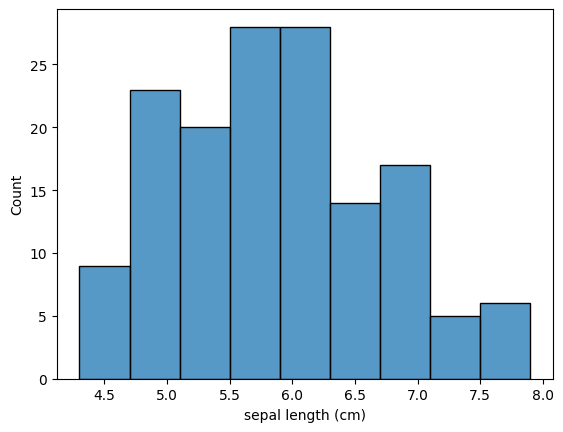

In [4]:
sns.histplot(X, x = "sepal length (cm)")

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

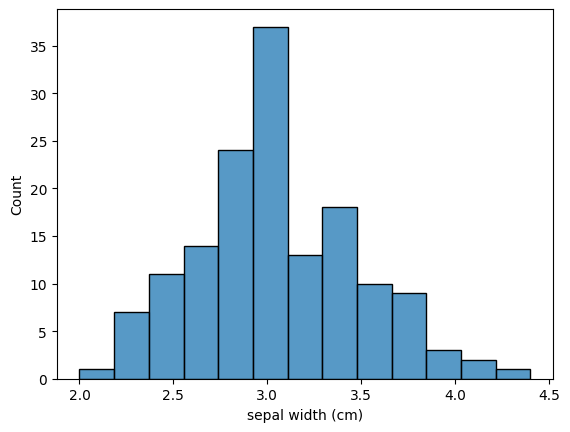

In [5]:
sns.histplot(X, x = "sepal width (cm)")

<Axes: xlabel='petal length (cm)', ylabel='Count'>

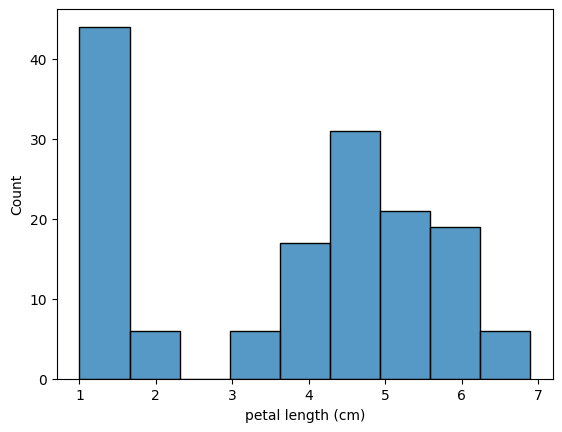

In [6]:
sns.histplot(X, x = "petal length (cm)")

<Axes: xlabel='petal width (cm)', ylabel='Count'>

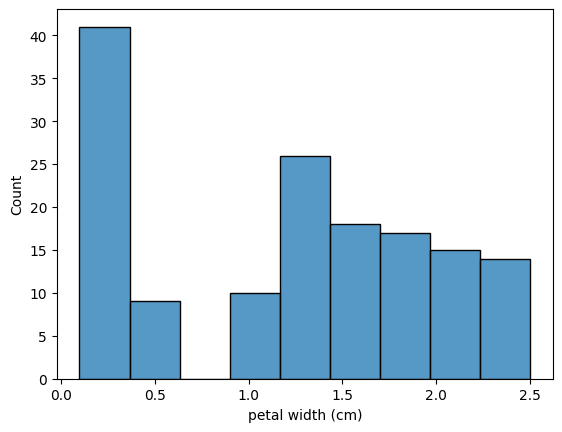

In [7]:
sns.histplot(X, x = "petal width (cm)")

2. Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:
-  długość płatka (PetalLengthCm) na poziomie: 0.5
-  długość przegrody (PetalLengthCm) na poziomie: 0.38

Podaj zysk informacyjny na każdym z podziałów

In [8]:
merged_df = pd.concat([X, y], axis=1)
merged_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
p0 = len(merged_df[(merged_df["target"] == 0)]) / len(y)
p1 = len(merged_df[(merged_df["target"] == 1)]) / len(y)
p2 = len(merged_df[(merged_df["target"] == 2)]) / len(y)
entropia_przed = -(p0 * math.log(p0, 2) + p1* math.log(p1, 2)  + p2 * math.log(p2, 2))
entropia_przed

1.584962500721156

In [10]:
p0A = len(merged_df[(merged_df["petal width (cm)"] <= 0.5) & (merged_df["target"] == 0)]) / len(merged_df[(merged_df["petal width (cm)"] <= 0.5)])
p1A = len(merged_df[(merged_df["petal width (cm)"] <= 0.5) & (merged_df["target"] == 1)]) / len(merged_df[(merged_df["petal width (cm)"] <= 0.5)])
p2A = len(merged_df[(merged_df["petal width (cm)"] <= 0.5) & (merged_df["target"] == 2)]) / len(merged_df[(merged_df["petal width (cm)"] <= 0.5)])

entropiaA = -(p0A * math.log(p0A, 2) + p1A  + p2A )


p0B = len(merged_df[(merged_df["petal width (cm)"] > 0.5) & (merged_df["target"] == 0)]) / len(merged_df[(merged_df["petal width (cm)"] > 0.5)])
p1B = len(merged_df[(merged_df["petal width (cm)"] > 0.5) & (merged_df["target"] == 1)]) / len(merged_df[(merged_df["petal width (cm)"] > 0.5)])
p2B = len(merged_df[(merged_df["petal width (cm)"] > 0.5) & (merged_df["target"] == 2)]) / len(merged_df[(merged_df["petal width (cm)"] > 0.5)])

entropiaB = -(p0B * math.log(p0B, 2) + p1B* math.log(p1B, 2)  + p2B * math.log(p2B, 2))

print(entropiaA, entropiaB)
average_entropy = (entropiaA+entropiaB)/2
average_entropy

-0.0 1.0702350572322654


0.5351175286161327

In [11]:
#zysk informacyjny
zysk05 = entropia_przed - average_entropy
zysk05

1.0498449721050234

In [12]:
p0AA = len(merged_df[(merged_df["petal width (cm)"] <= 0.38) & (merged_df["target"] == 0)]) / len(merged_df[(merged_df["petal width (cm)"] <= 0.38)])
p1AA = len(merged_df[(merged_df["petal width (cm)"] <= 0.38) & (merged_df["target"] == 1)]) / len(merged_df[(merged_df["petal width (cm)"] <= 0.38)])
p2AA = len(merged_df[(merged_df["petal width (cm)"] <= 0.38) & (merged_df["target"] == 2)]) / len(merged_df[(merged_df["petal width (cm)"] <= 0.38)])

entropiaAA = -(p0AA * math.log(p0AA, 2) + p1AA + p2AA )


p0BB = len(merged_df[(merged_df["petal width (cm)"] > 0.38) & (merged_df["target"] == 0)]) / len(merged_df[(merged_df["petal width (cm)"] > 0.38)])
p1BB = len(merged_df[(merged_df["petal width (cm)"] > 0.38) & (merged_df["target"] == 1)]) / len(merged_df[(merged_df["petal width (cm)"] > 0.38)])
p2BB = len(merged_df[(merged_df["petal width (cm)"] > 0.38) & (merged_df["target"] == 2)]) / len(merged_df[(merged_df["petal width (cm)"] > 0.38)])

entropiaBB = -(p0BB * math.log(p0BB, 2) + p1BB* math.log(p1BB, 2)  + p2BB * math.log(p2BB, 2))

print(entropiaAA, entropiaBB)
average_entropyy = (entropiaAA+entropiaBB)/2
average_entropyy

-0.0 1.3285976826626764


0.6642988413313382

In [13]:
zysk038 = entropia_przed - average_entropyy
zysk038

0.9206636593898179

3. Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
median_absolute_error(y_test, y_predict)

<ipython-input-15-ef8c2ff11387>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.0

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_predict2 = tree.predict(X_test)
median_absolute_error(y_test, y_predict2)

0.0

In [19]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)


In [20]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

In [25]:
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators = 15, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność:", accuracy_rf)


<ipython-input-25-4f86484119a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Dokładność: 1.0


In [35]:
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2, 3, 4, 5]}
clftree = GridSearchCV(tree, parameters)
clftree.fit(iris.data, iris.target)
GridSearchCV(estimator = tree, param_grid=parameters)
sorted(clftree.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [30]:
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2, 3, 4, 5]}
clf = GridSearchCV(random_forest, parameters)
clf.fit(iris.data, iris.target)
GridSearchCV(estimator = random_forest, param_grid=parameters)
sorted(clf.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']